<a href="https://colab.research.google.com/github/Blf100/Analise-Materias-Primas-Agricolas/blob/main/Agricultura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de matérias-primas agrícolas

#### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')
warnings.simplefilter("ignore")

#### Importando os dados

In [2]:
df_agri = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Agricultura/agricultural_raw_material.csv')

#### Primeiras impressões sobre os dados

In [3]:
# Primeiras linhas do dataset
df_agri.head(5)

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr-90,482.34,-,236,-,1.83,-,"1,071.63",-,161.20,...,312.36,-,0.84,-,120.66,-,218.76,-,829.29,-
1,May-90,447.26,-7.27%,234,-0.85%,1.89,3.28%,"1,057.18",-1.35%,172.86,...,350.12,12.09%,0.85,1.19%,124.28,3.00%,213.00,-2.63%,842.51,1.59%
2,Jun-90,440.99,-1.40%,216,-7.69%,1.99,5.29%,898.24,-15.03%,181.67,...,373.94,6.80%,0.85,0.00%,129.45,4.16%,200.00,-6.10%,831.35,-1.32%
3,Jul-90,418.44,-5.11%,205,-5.09%,2.01,1.01%,895.83,-0.27%,187.96,...,378.48,1.21%,0.86,1.18%,124.23,-4.03%,210.05,5.03%,798.83,-3.91%
4,Aug-90,418.44,0.00%,198,-3.41%,1.79,-10.95%,951.22,6.18%,186.13,...,364.60,-3.67%,0.88,2.33%,129.70,4.40%,208.30,-0.83%,818.74,2.49%


In [4]:
# Tamanho do dataset
df_agri.shape

(361, 25)

In [5]:
# Informações gerais do dataset
df_agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         361 non-null    object 
 1   Coarse wool Price             327 non-null    object 
 2   Coarse wool price % Change    327 non-null    object 
 3   Copra Price                   339 non-null    object 
 4   Copra price % Change          339 non-null    object 
 5   Cotton Price                  361 non-null    float64
 6   Cotton price % Change         361 non-null    object 
 7   Fine wool Price               327 non-null    object 
 8   Fine wool price % Change      327 non-null    object 
 9   Hard log Price                361 non-null    float64
 10  Hard log price % Change       361 non-null    object 
 11  Hard sawnwood Price           327 non-null    float64
 12  Hard sawnwood price % Change  327 non-null    object 
 13  Hide 

In [6]:
# Nome das colunas
df_agri.columns

Index(['Month', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')

In [7]:
# Calculando a quantidade de registros faltantes para cada coluna
df_agri.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [8]:
# Estatísticas descritivas
df_agri.describe()

,Cotton Price,Hard log Price,Hard sawnwood Price,Hide Price,Plywood Price,Rubber Price,Softlog Price,Soft sawnwood Price,Wood pulp Price
count,361.000000,361.000000,327.000000,327.000000,361.000000,361.000000,327.000000,327.000000,360.000000
mean,1.640000,251.034072,707.950367,78.566667,508.216122,1.656427,164.527462,291.061713,696.670889
std,0.513319,65.628406,144.563241,13.690623,89.274718,1.017086,25.596308,34.113959,161.156936
min,0.820000,133.280000,413.370000,28.590000,312.360000,0.490000,119.350000,183.610000,384.000000
25%,1.290000,197.960000,573.470000,69.495000,442.540000,0.860000,145.970000,277.590000,549.777500
50%,1.600000,253.010000,728.710000,77.250000,505.040000,1.440000,160.370000,294.960000,693.580000
75%,1.850000,282.970000,831.635000,86.000000,570.790000,2.060000,180.210000,310.865000,875.000000
max,5.060000,520.810000,973.600000,114.630000,751.810000,6.260000,259.970000,372.600000,966.490000


#### Tratando os dados

In [9]:
# Substituindo caracters inapropriados
df_agri = df_agri.replace('%', '', regex=True)
df_agri.mask(df_agri == '-', np.nan, inplace=True)
df_agri['Month'] = df_agri['Month'].replace('-', '', regex=True)
df_agri = df_agri.replace(',', '', regex=True)
df_agri.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
0,Apr90,482.34,NaN,236,NaN,1.83,NaN,1071.63,NaN,161.20,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1,May90,447.26,-7.27,234,-0.85,1.89,3.28,1057.18,-1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59
2,Jun90,440.99,-1.40,216,-7.69,1.99,5.29,898.24,-15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32
3,Jul90,418.44,-5.11,205,-5.09,2.01,1.01,895.83,-0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91
4,Aug90,418.44,0.00,198,-3.41,1.79,-10.95,951.22,6.18,186.13,...,364.60,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49


In [10]:
# Transformando coluna Month em data
df_agri['Month'] = pd.to_datetime(df_agri['Month'].str.upper(), format='%b%y', yearfirst=False)
df_agri.set_index('Month', inplace=True)

In [11]:
df_agri.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-04-01,482.34,NaN,236,NaN,1.83,NaN,1071.63,NaN,161.20,NaN,...,312.36,NaN,0.84,NaN,120.66,NaN,218.76,NaN,829.29,NaN
1990-05-01,447.26,-7.27,234,-0.85,1.89,3.28,1057.18,-1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,-2.63,842.51,1.59
1990-06-01,440.99,-1.40,216,-7.69,1.99,5.29,898.24,-15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,-6.10,831.35,-1.32
1990-07-01,418.44,-5.11,205,-5.09,2.01,1.01,895.83,-0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,-4.03,210.05,5.03,798.83,-3.91
1990-08-01,418.44,0.00,198,-3.41,1.79,-10.95,951.22,6.18,186.13,-0.97,...,364.60,-3.67,0.88,2.33,129.70,4.40,208.30,-0.83,818.74,2.49


In [12]:
# Convertendo valores para float
df_agri = df_agri.astype('float')

In [13]:
df_agri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1990-04-01 to 2020-04-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             327 non-null    float64
 1   Coarse wool price % Change    326 non-null    float64
 2   Copra Price                   339 non-null    float64
 3   Copra price % Change          338 non-null    float64
 4   Cotton Price                  361 non-null    float64
 5   Cotton price % Change         360 non-null    float64
 6   Fine wool Price               327 non-null    float64
 7   Fine wool price % Change      326 non-null    float64
 8   Hard log Price                361 non-null    float64
 9   Hard log price % Change       360 non-null    float64
 10  Hard sawnwood Price           327 non-null    float64
 11  Hard sawnwood price % Change  326 non-null    float64
 12  Hide Price                    327 non-null   

In [14]:
# Ecluindo valores ausentes
df_agri.dropna(inplace=True)

In [15]:
df_agri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 1990-05-01 to 2017-06-01
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Coarse wool Price             326 non-null    float64
 1   Coarse wool price % Change    326 non-null    float64
 2   Copra Price                   326 non-null    float64
 3   Copra price % Change          326 non-null    float64
 4   Cotton Price                  326 non-null    float64
 5   Cotton price % Change         326 non-null    float64
 6   Fine wool Price               326 non-null    float64
 7   Fine wool price % Change      326 non-null    float64
 8   Hard log Price                326 non-null    float64
 9   Hard log price % Change       326 non-null    float64
 10  Hard sawnwood Price           326 non-null    float64
 11  Hard sawnwood price % Change  326 non-null    float64
 12  Hide Price                    326 non-null   

#### Análise exploratória e vizualização dos dados

##### Qual a correlação entre os atributos?

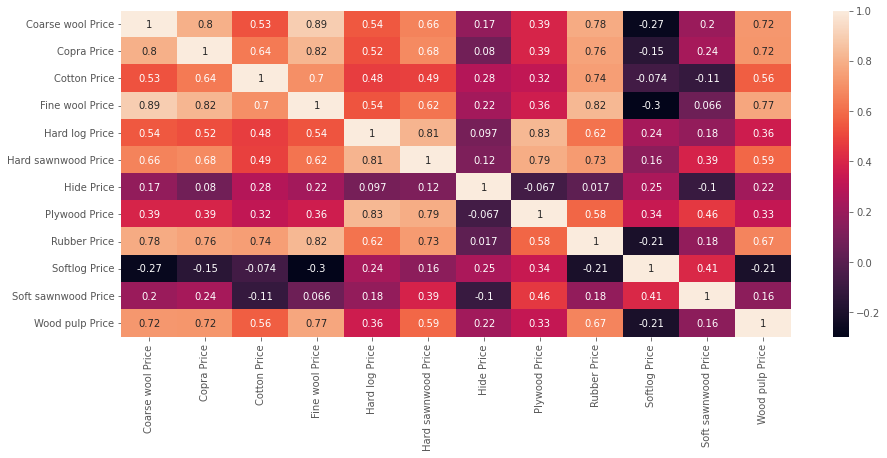

In [16]:
# Mapa de correlação entre preços
plt.figure(figsize=(15,6))
corr_precos = df_agri.iloc[:,0::2].corr() 
sns.heatmap(data=corr_precos, annot= True);

Gráfico de dispersão entre os preços com maior correlação

In [17]:
# Número de subplots
tamanho_subplots = []

for i in corr_precos.columns:
  for j in range(0, len(corr_precos[i])):
   if (corr_precos[i][j] >= 0.8 and corr_precos[i][j] < 1):
     tamanho_subplots.append(corr_precos[i][j])
print(len(tamanho_subplots))

12


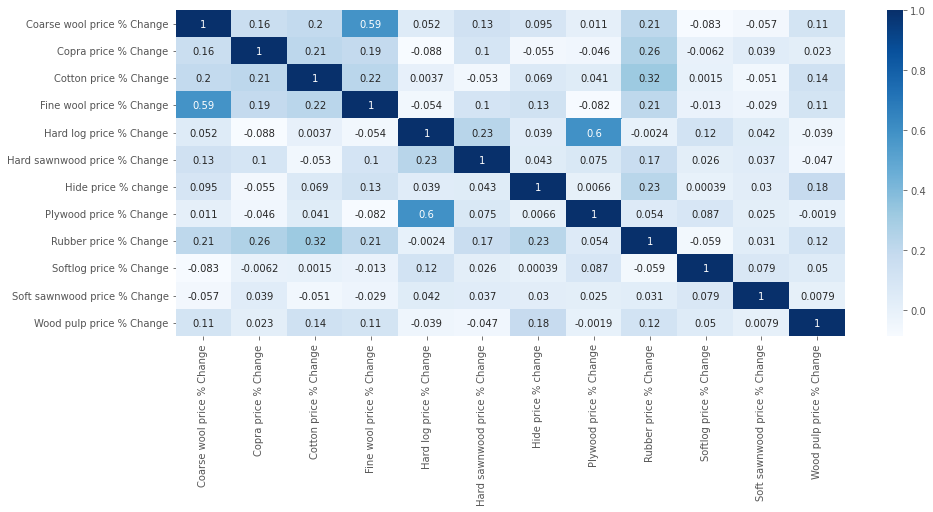

In [19]:
# Mapa de correlação entre variações percentuais
plt.figure(figsize=(15,6))
corr_percentual = df_agri.iloc[:, 1::2].corr()
sns.heatmap(data=corr_percentual, annot=True, cmap="Blues");

#### Como se comportou os preços e variações percentuais com o passar dos anos?

Plotando preços em um único gráfico

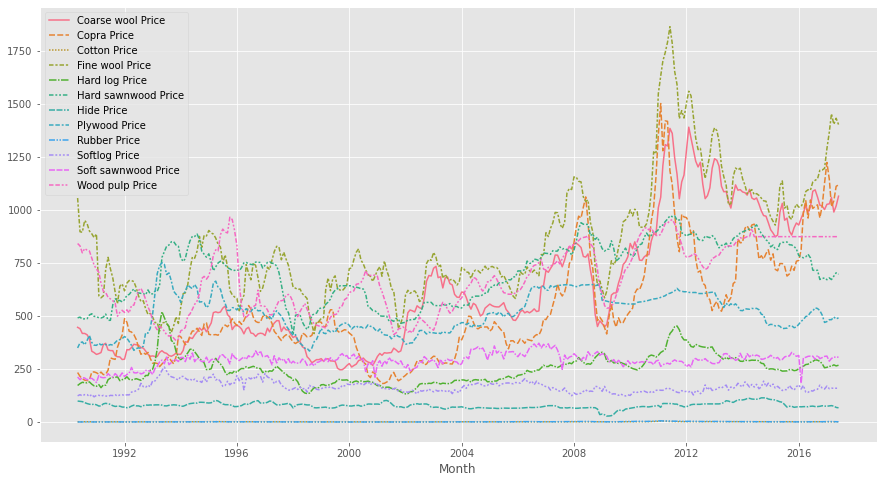

In [20]:
# Gráfico para preços
plt.figure(figsize=(15,8))
df_agri_precos = df_agri.iloc[:,0::2]
sns.lineplot(data=df_agri_precos);

Plotando preços em gráficos paralelos

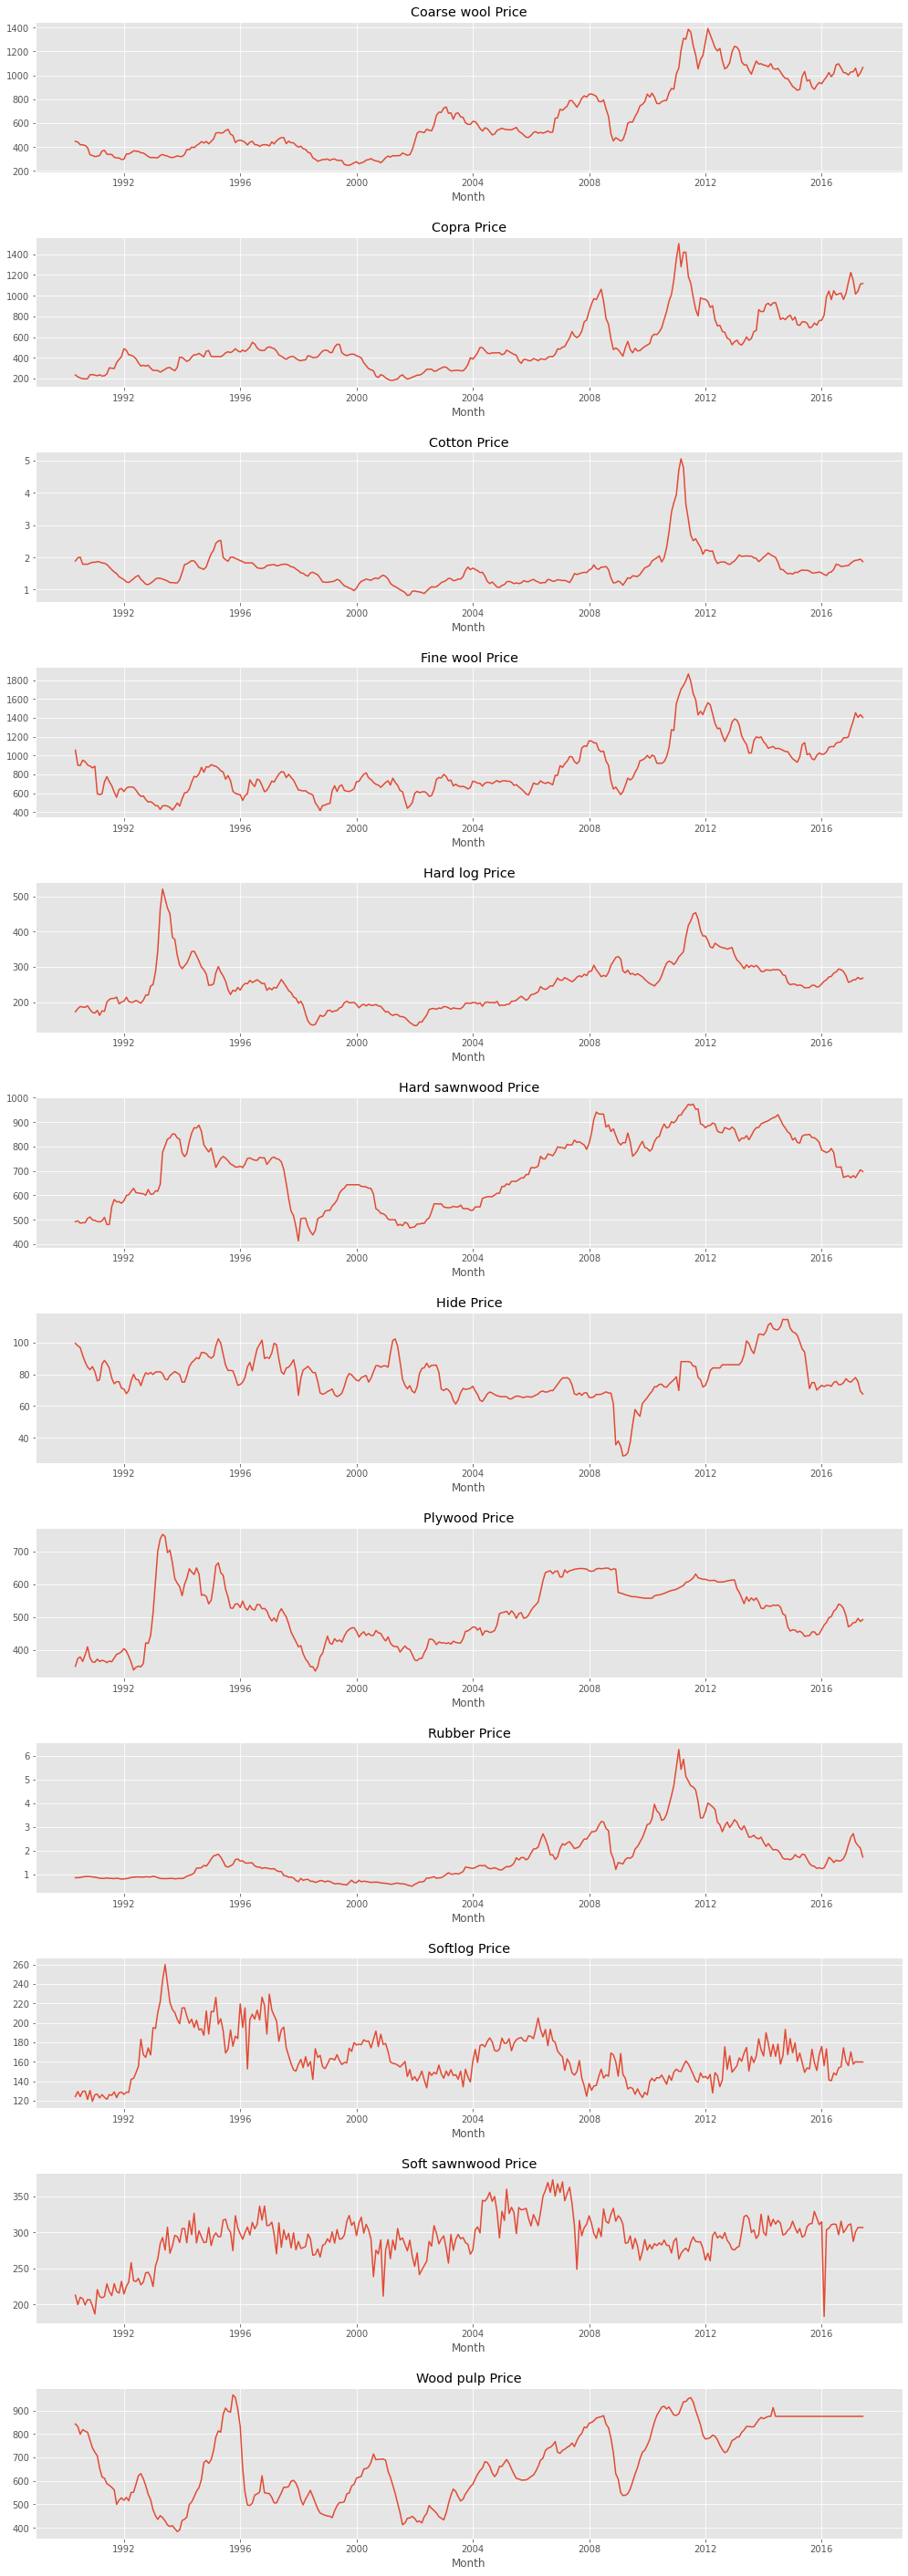

In [21]:
figure, axes = plt.subplots(nrows=12, ncols=1, figsize= (15, 40))
figure.tight_layout(pad=5.0)

for indice, coluna in enumerate(df_agri_precos.columns):
  sns.lineplot(data=df_agri_precos, x=df_agri_precos.index, y=df_agri_precos[coluna], ax=axes[indice])
  axes[indice].set_title(coluna)
  axes[indice].set_ylabel('')

Gráfico para variações percentuais

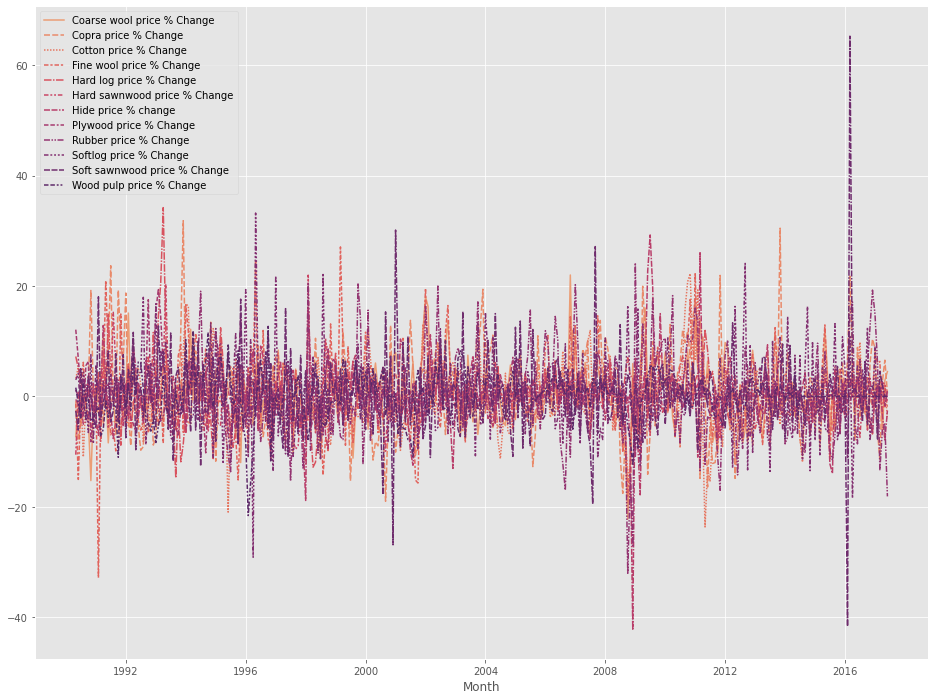

In [22]:
# Gráfico para variações percentuais
plt.figure(figsize=(16,12))
df_agri_percentual = df_agri.iloc[:, 1::2]
sns.lineplot(data=df_agri_percentual, palette="flare");

Variações percentuais em gráficos paralelos

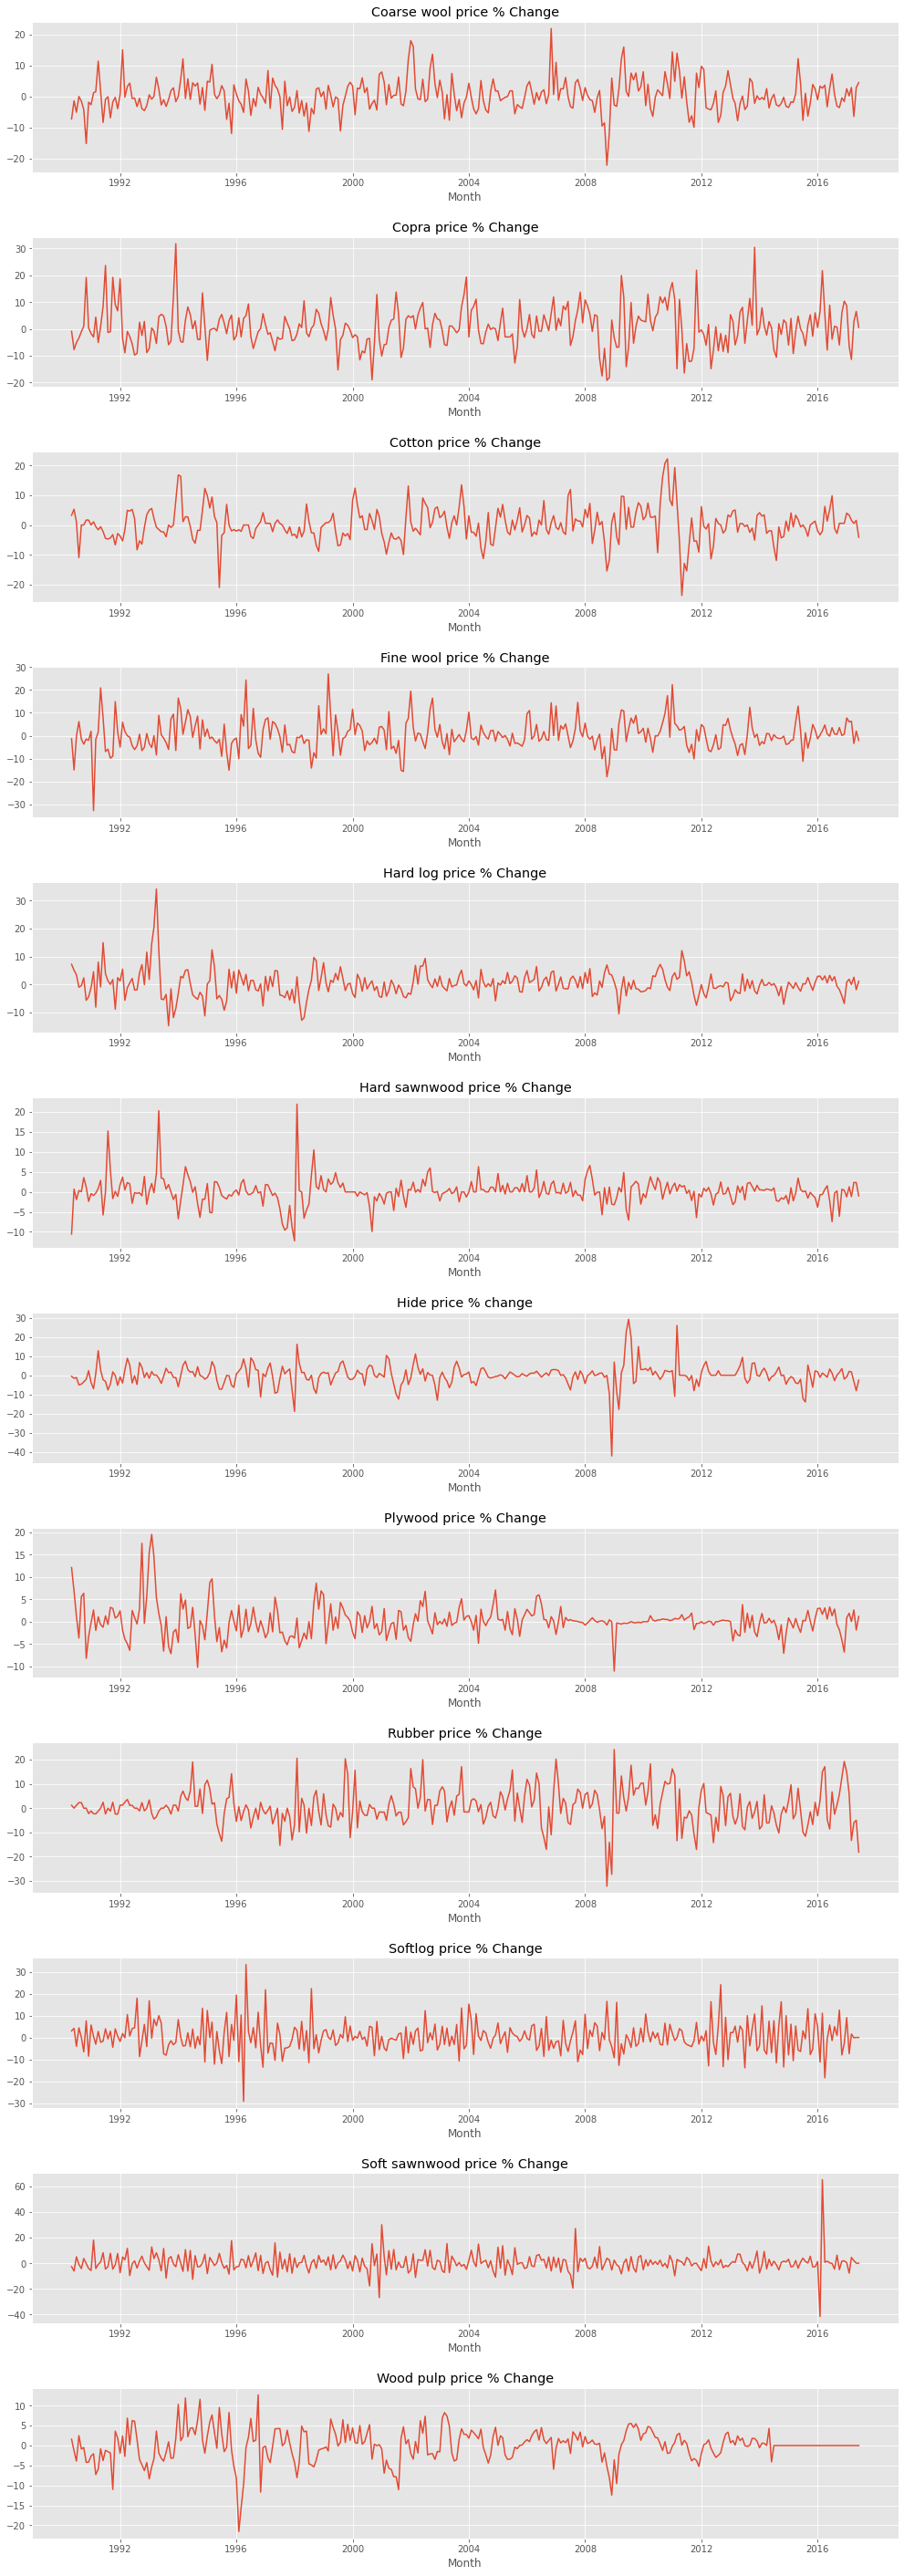

In [23]:
fig, axes = plt.subplots(nrows=12, ncols=1, figsize=(15,40))
fig.tight_layout(pad=5.0)

for indice, coluna in enumerate(df_agri_percentual.columns):
  sns.lineplot(data=df_agri_percentual, ax=axes[indice], x=df_agri_percentual.index, y=df_agri_percentual[coluna])
  axes[indice].set_ylabel('')
  axes[indice].set_title(coluna)


Destribuição dos preços das matérias-primas

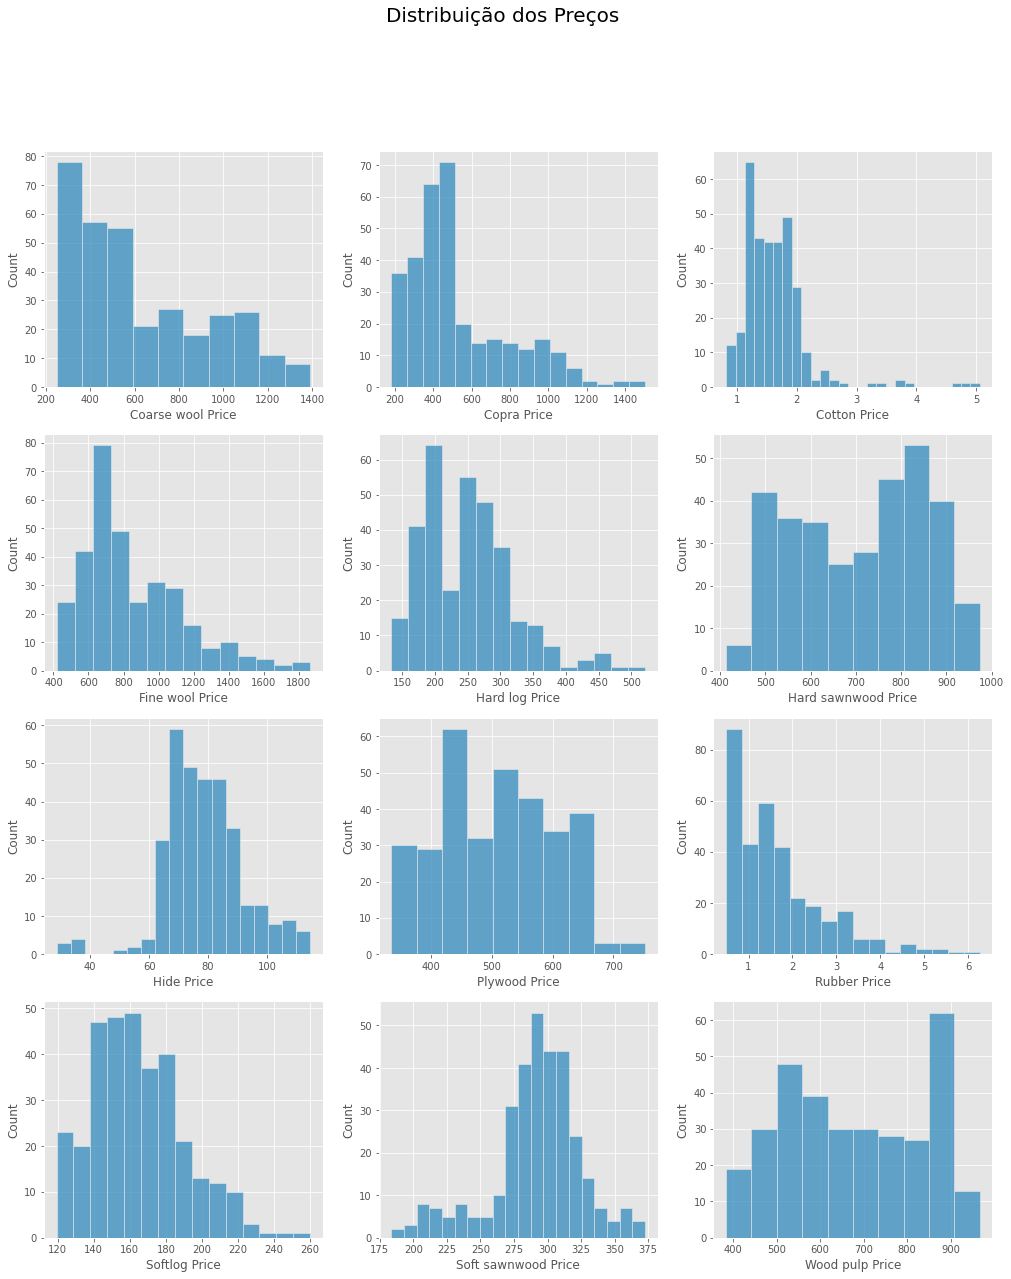

In [24]:
figure = plt.figure(figsize=(17,20))
figure.tight_layout(pad=5.0)

for i in range(0, len(df_agri_precos.columns)):
  plt.subplot(4, 3, i+1)
  sns.histplot(data=df_agri_precos, x=df_agri_precos.columns[i])
  plt.xlabel(df_agri_precos.columns[i])
plt.suptitle('Distribuição dos Preços', fontsize=20)
plt.show()

Boxplot dos preços das matérias primas

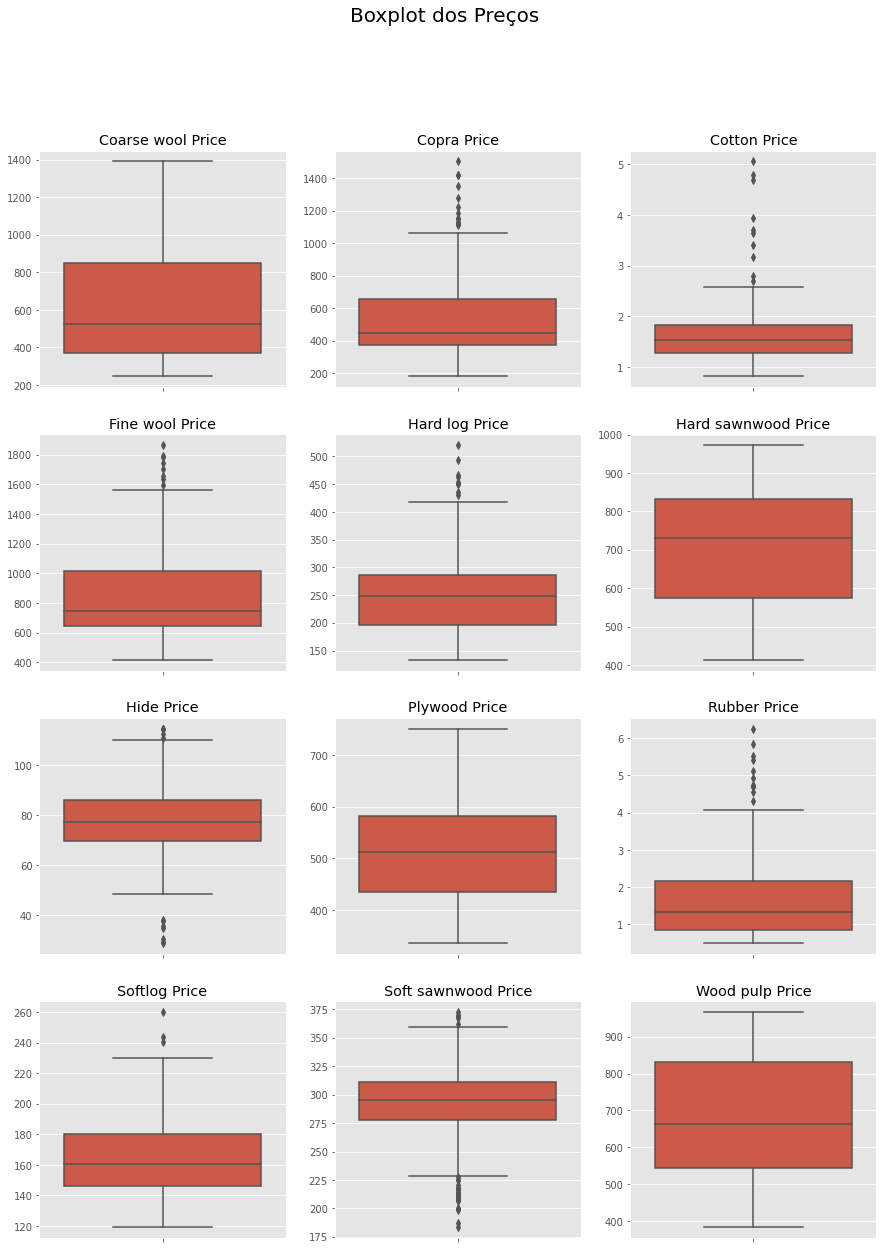

In [25]:
plt.figure(figsize=(15, 20))

for i in range(0, len(df_agri_precos.columns)):
  plt.subplot(4, 3, i+1)
  sns.boxplot(data=df_agri_precos, y=df_agri_precos.columns[i])
  plt.xlabel('')
  plt.ylabel('')
  plt.title(df_agri_precos.columns[i])
plt.suptitle('Boxplot dos Preços', fontsize=20)  
plt.show()

Distribuição das variações percentuais dos preços

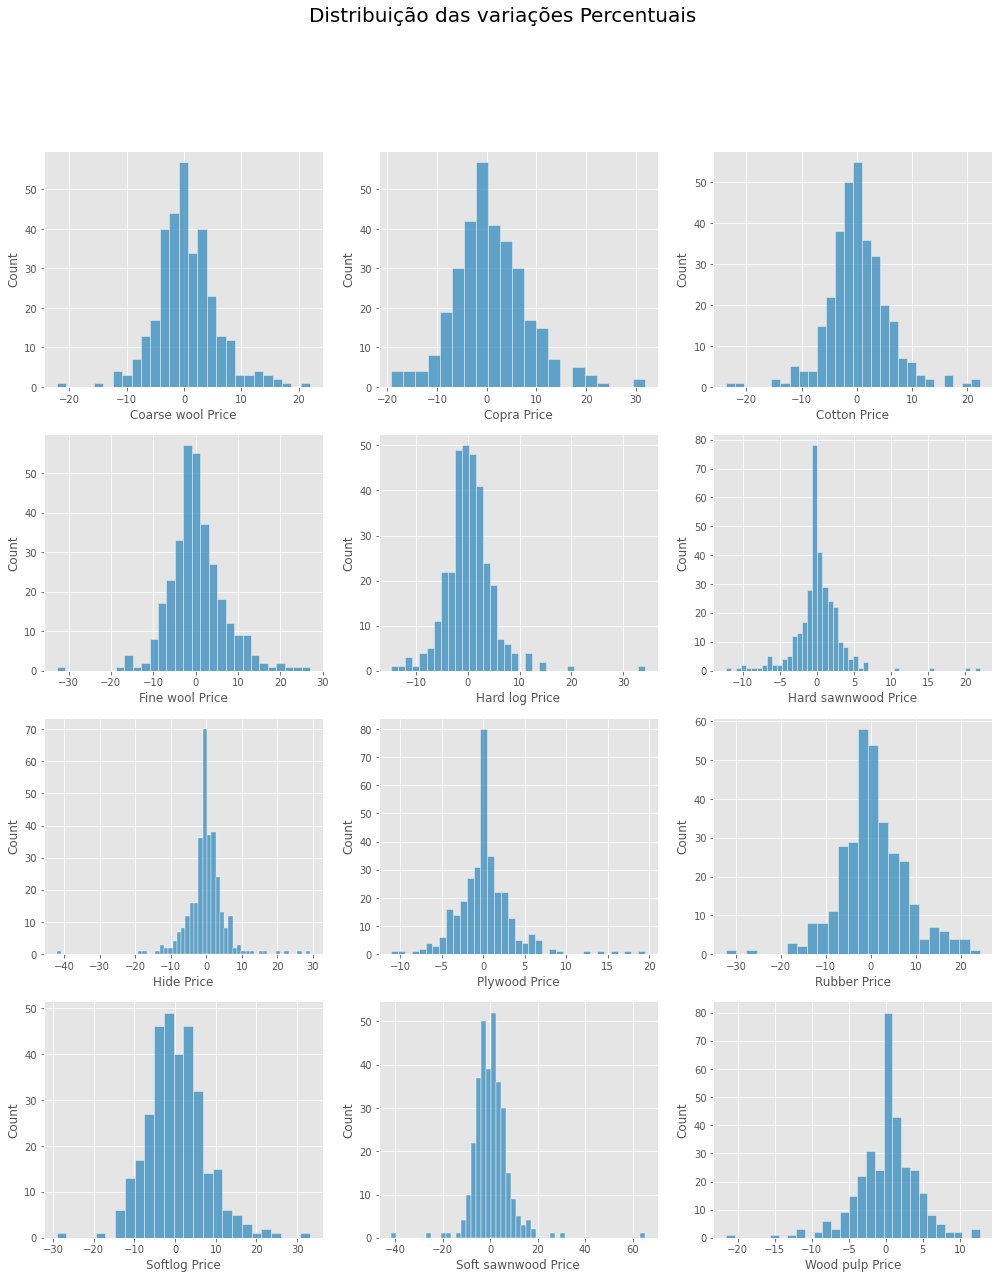

In [26]:
figure = plt.figure(figsize=(17,20))
figure.tight_layout(pad=5.0)

for i in range(0, len(df_agri_percentual.columns)):
  plt.subplot(4, 3, i+1)
  sns.histplot(data=df_agri_percentual, x=df_agri_percentual.columns[i])
  plt.xlabel(df_agri_precos.columns[i])
plt.suptitle('Distribuição das variações Percentuais', fontsize=20)
plt.show()

Boxplot das variações percentuais dos preços

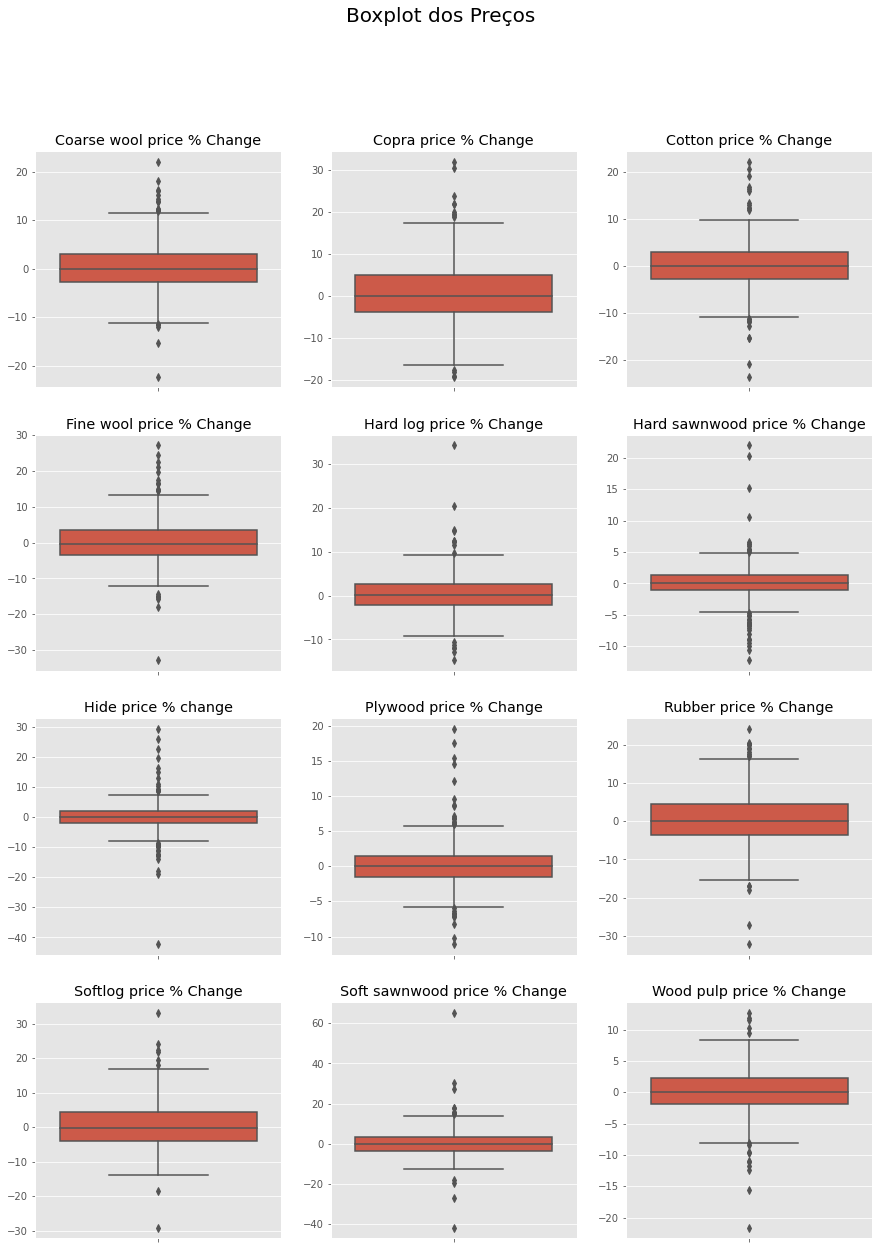

In [27]:
plt.figure(figsize=(15, 20))

for i in range(0, len(df_agri_percentual.columns)):
  plt.subplot(4, 3, i+1)
  sns.boxplot(data=df_agri_percentual, y=df_agri_percentual.columns[i])
  plt.xlabel('')
  plt.ylabel('')
  plt.title(df_agri_percentual.columns[i])
plt.suptitle('Boxplot dos Preços', fontsize=20)  
plt.show()